In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [4]:
bikes = pd.read_csv('/Users/zoezhu/Downloads/bikes_sharing.csv')

In [5]:
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [6]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


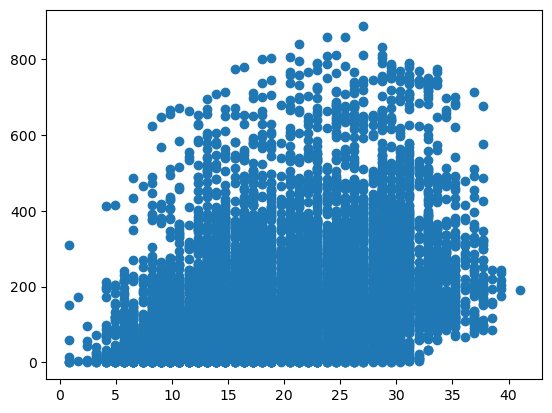

In [8]:
plt.scatter(bikes['temp'],bikes['registered'])

In [9]:
x = bikes['temp']
y = bikes['casual']

In [10]:
results =ols("casual ~ temp",data = bikes).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     3037.
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:32:36   Log-Likelihood:                -56684.
No. Observations:               10886   AIC:                         1.134e+05
Df Residuals:                   10884   BIC:                         1.134e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.5710      1.178    -20.855      0.0

In [ ]:
"y_hat =53.1426 +2.9255temp - 0.8365humidity -36.0416 workingday"

In [11]:
53.1426+ (2.9255 * 9.84) - (0.8365*81) - (36.0416*0)

14.173019999999994

In [13]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
pred_vals = results.predict(bikes[['temp','humidity','workingday']])

In [16]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),bikes['casual']],axis=1)

In [19]:
res['error'] = res['y_hat']-res['casulal']

KeyError: 'casulal'

In [18]:
res['sq_error'] = res['error']**2

KeyError: 'error'

In [ ]:
np.sqrt(res['sq_error'].mean())

In [15]:
pred_vals.to_frame().rename(columns={})

0         4.900556
1         2.444595
2         2.444595
3         4.900556
4         4.900556
           ...    
10881    22.092283
10882    19.636322
10883    17.180361
10884    17.180361
10885    14.724400
Length: 10886, dtype: float64